<a href="https://colab.research.google.com/github/PraveenPrabhat125/Python-for-Data-Analyst/blob/main/Python_for_data_analyst_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas
In the last lesson, we learned that Numpy's ndarrays well-suited for performing math operations on one and two-dimensional arrays of numeric values, but they fall short when it comes to dealing with heterogeneous data sets. To store data from an external source like an excel workbook or database, we need a data structure that can hold different data types. It is also desirable to be able to refer to rows and columns in the data by custom labels rather than numbered indexes.

The pandas library offers data structures designed with this in mind: the series and the DataFrame. Series are 1-dimensional labeled arrays similar to numpy's ndarrays, while DataFrames are labeled 2-dimensional structures, that essentially function as spreadsheet tables.

## Pandas Series
Before we get into DataFrames, we'll take a brief detour to explore pandas series. Series are very similar to ndarrays: the main difference between them is that with series, you can provide custom index labels and then operations you perform on series automatically align the data based on the labels.

To create a new series, first load the numpy and pandas libraries:

In [1]:
import numpy as np
import pandas as pd

In [2]:
my_series = pd.Series(data = [2,3,4,5],   # data
                      index = ['a', 'b', 'c', 'd']) # index
my_series

a    2
b    3
c    4
d    5
dtype: int64

In [3]:
my_series['a']

2

You can also create a series from a dictionary, in which case the dictionary keys act as the labels and the values act as the data:

In [4]:
my_dict = {"x": 2, "a": 5, "b": 4, "c": 8}

my_series2 = pd.Series(my_dict)
my_series2

x    2
a    5
b    4
c    8
dtype: int64

In [5]:
my_series2['b']

4

Numeric indexing also works

In [7]:
my_series2[3]

8

If you take a slice of a series, you get both the values and the labels contained in the slice:

In [9]:
print(my_series2[:])

print(my_series2[1:])


x    2
a    5
b    4
c    8
dtype: int64
a    5
b    4
c    8
dtype: int64


In [11]:
print(my_series2[:])

print(my_series[:])
# additon
my_series2 + my_series

x    2
a    5
b    4
c    8
dtype: int64
a    2
b    3
c    4
d    5
dtype: int64


a     7.0
b     7.0
c    12.0
d     NaN
x     NaN
dtype: float64

If you perform an operation with two series that have different labels, the unmatched labels will return a value of NaN (not a number.).

In [12]:
np.mean(my_series)

3.5

## DataFrame Creation and Indexing

A DataFrame is a 2D table with labeled columns that can each hold different types of data. DataFrames are essentially a Python implementation of the types of tables you'd see in an Excel workbook or SQL database. DataFrames are the defacto standard data structure for working with tabular data in Python; we'll be using them a lot throughout the remainder of this guide.

You can create a DataFrame out a variety of data sources like dictionaries, 2D numpy arrays and series using the pd.DataFrame() function. Dictionaries provide an intuitive way to create DataFrames: when passed to pd.DataFrame() a dictionary's keys become column labels and the values become the columns themselves:


In [21]:
# Create a dictionary with some different data types as values

my_dict = {"name" : ["Joe","Bob","Frans"],
           "age" : np.array([10,15,20]),
           "weight" : (75,123,239),
           "height" : pd.Series([4.5, 5, 6.1],
                                index=["Joe","Bob","Frans"]),
           "siblings" : 1,
           "gender" : "M"}

df = pd.DataFrame(my_dict)   # Convert the dict to DataFrame

df                           # Show the DataFrame

,name,age,weight,height,siblings,gender
Joe,Joe,10,75,4.5,1,M
Bob,Bob,15,123,5.0,1,M
Frans,Frans,20,239,6.1,1,M


In [25]:
my_new_dict = {
    "age" : [10,20,30],
    "Weight": [40, 30,50],
    "height": [2.3,4.5,6],
    'sibling': [1,1,2],
    'gender': ['M', 'M', 'F'],
    'const': 1
}

# conert dict to DataFrame with specific index
df = pd.DataFrame(my_new_dict, index = ['Will', 'Lucas', 'Nancy'])
df

,age,Weight,height,sibling,gender,const
Will,10,40,2.3,1,M,1
Lucas,20,30,4.5,1,M,1
Nancy,30,50,6.0,2,F,1


In [28]:
# Add new column
df['h/w'] = df['height']/ df['Weight']
df

,age,Weight,height,sibling,gender,const,h/w
Will,10,40,2.3,1,M,1,0.0575
Lucas,20,30,4.5,1,M,1,0.1500
Nancy,30,50,6.0,2,F,1,0.1200


## accessing specific elements, rows, and columns using indexing and slicing.

In [31]:
df1 = df
df1


,age,Weight,height,sibling,gender,const,h/w
Will,10,40,2.3,1,M,1,0.0575
Lucas,20,30,4.5,1,M,1,0.1500
Nancy,30,50,6.0,2,F,1,0.1200


## loc - Label-based Indexing
Usage: loc is used for label-based indexing, meaning you use row and column labels to access data.
Syntax: df.loc[row_label, column_label]
Inclusive: The slicing with loc is inclusive of both start and stop labels.
Supports: Can handle boolean arrays for selection.

## iloc - Integer-based Indexing
Usage: iloc is used for integer-based indexing, meaning you use row and column positions to access data.
Syntax: df.iloc[row_position, column_position]
Exclusive: The slicing with iloc is exclusive of the stop position, similar to standard Python slicing.
Supports: Only integer-based slicing and indexing.


Feature	loc	iloc
Indexing	Label-based	Integer-based
Syntax	df.loc[row_label, col_label]	df.iloc[row_index, col_index]
Slicing	Inclusive of end label	Exclusive of end index
Supports	Labels, boolean arrays	Integer positions only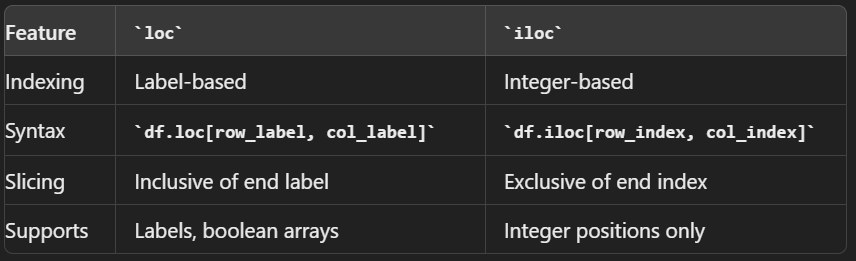

In [32]:
df1

,age,Weight,height,sibling,gender,const,h/w
Will,10,40,2.3,1,M,1,0.0575
Lucas,20,30,4.5,1,M,1,0.1500
Nancy,30,50,6.0,2,F,1,0.1200


In [34]:
Nancy_data = df1.loc['Nancy', ['age', 'Weight', 'height']]
Nancy_data

age        30
Weight     50
height    6.0
Name: Nancy, dtype: object

In [41]:
print(df1[:1])

print(df1.loc['Nancy', 'h/w'])

      age  Weight  height  sibling gender  const     h/w
Will   10      40     2.3        1      M      1  0.0575
0.12


In [43]:
# iloc
will_data = df1.iloc[0]
will_data


age            10
Weight         40
height        2.3
sibling         1
gender          M
const           1
h/w        0.0575
Name: Will, dtype: object

In [53]:
# will age and wight
df1.iloc[0, [0,1]]

age       10
Weight    40
Name: Will, dtype: object

In [58]:
print(df1.iloc[:2])

print(df1.iloc[:2, :])

print(df1.iloc[:2, :3])

       age  Weight  height  sibling gender  const     h/w
Will    10      40     2.3        1      M      1  0.0575
Lucas   20      30     4.5        1      M      1  0.1500
       age  Weight  height  sibling gender  const     h/w
Will    10      40     2.3        1      M      1  0.0575
Lucas   20      30     4.5        1      M      1  0.1500
       age  Weight  height
Will    10      40     2.3
Lucas   20      30     4.5


In [60]:
wight_nancy = df1.loc['Nancy', 'Weight']
wight_nancy

50

In [61]:
wight_nancy = df1.loc['Nancy', ['Weight', 'age']]
wight_nancy

Weight    50
age       30
Name: Nancy, dtype: object

In [67]:
print(df1.loc['Nancy'])

print(df1.loc['Nancy'].age)


age          30
Weight       50
height      6.0
sibling       2
gender        F
const         1
h/w        0.12
Name: Nancy, dtype: object
30


### Columns accessing

In [73]:
df1
print(df1["age"])

print(df1["age"].sum())


Will     10
Lucas    20
Nancy    30
Name: age, dtype: int64
60


In [77]:
df1[['age', 'h/w', 'height']]

,age,h/w,height
Will,10,0.0575,2.3
Lucas,20,0.1500,4.5
Nancy,30,0.1200,6.0


In [80]:
# adding a columns
df['college'] = ['Hokins', 'Hokins M', 'Hokins M']
df2 = df
df2

,age,Weight,height,sibling,gender,const,h/w,college
Will,10,40,2.3,1,M,1,0.0575,Hokins
Lucas,20,30,4.5,1,M,1,0.1500,Hokins M
Nancy,30,50,6.0,2,F,1,0.1200,Hokins M


In [84]:
# adding row
df.loc['jonathan'] = [23, 55, 3.4, 2, 'M', 2, 2.3, 'Hokins M']
df

,age,Weight,height,sibling,gender,const,h/w,college
Will,10,40,2.3,1,M,1,0.0575,Hokins
Lucas,20,30,4.5,1,M,1,0.1500,Hokins M
Nancy,30,50,6.0,2,F,1,0.1200,Hokins M
jonathan,23,55,3.4,2,M,2,2.3000,Hokins M


## Data filters

In [90]:
df2['age']>10

Will        False
Lucas        True
Nancy        True
jonathan     True
Name: age, dtype: bool

In [91]:
df2[df2['age']>10]

,age,Weight,height,sibling,gender,const,h/w,college
Lucas,20,30,4.5,1,M,1,0.15,Hokins M
Nancy,30,50,6.0,2,F,1,0.12,Hokins M
jonathan,23,55,3.4,2,M,2,2.30,Hokins M


In [93]:
# multiple condition
df2[(df2['age']>10) & (df2['Weight'] > 30)]

,age,Weight,height,sibling,gender,const,h/w,college
Nancy,30,50,6.0,2,F,1,0.12,Hokins M
jonathan,23,55,3.4,2,M,2,2.30,Hokins M


In [102]:
# multiple condition
df_temp = df2[(df2['age']>10) & (df2['Weight'] > 30)]
print(df_temp)

df_temp.loc['Nancy', ['age', 'height']]

          age  Weight  height  sibling gender  const   h/w   college
Nancy      30      50     6.0        2      F      1  0.12  Hokins M
jonathan   23      55     3.4        2      M      2  2.30  Hokins M


age        30
height    6.0
Name: Nancy, dtype: object

## Filter Using query Method
Example: Filter Rows Using a Query String:

In [103]:
df2.query('age> 15 and Weight > 30')

,age,Weight,height,sibling,gender,const,h/w,college
Nancy,30,50,6.0,2,F,1,0.12,Hokins M
jonathan,23,55,3.4,2,M,2,2.30,Hokins M


In [109]:
print(df2)
df2['age'].between(10, 24)

          age  Weight  height  sibling gender  const     h/w   college
Will       10      40     2.3        1      M      1  0.0575    Hokins
Lucas      20      30     4.5        1      M      1  0.1500  Hokins M
Nancy      30      50     6.0        2      F      1  0.1200  Hokins M
jonathan   23      55     3.4        2      M      2  2.3000  Hokins M


Will         True
Lucas        True
Nancy       False
jonathan     True
Name: age, dtype: bool

In [115]:

print(df2[df2['age'].between(10, 24)])


print(df2[df2['age'].between(10, 24)]['age'])


          age  Weight  height  sibling gender  const     h/w   college
Will       10      40     2.3        1      M      1  0.0575    Hokins
Lucas      20      30     4.5        1      M      1  0.1500  Hokins M
jonathan   23      55     3.4        2      M      2  2.3000  Hokins M
Will        10
Lucas       20
jonathan    23
Name: age, dtype: int64


In [117]:
print(df1)
print(df)
print(df2)

del df2['const']

print(df1)
print(df)
print(df2)

          age  Weight  height  sibling gender     h/w   college
Will       10      40     2.3        1      M  0.0575    Hokins
Lucas      20      30     4.5        1      M  0.1500  Hokins M
Nancy      30      50     6.0        2      F  0.1200  Hokins M
jonathan   23      55     3.4        2      M  2.3000  Hokins M
          age  Weight  height  sibling gender     h/w   college
Will       10      40     2.3        1      M  0.0575    Hokins
Lucas      20      30     4.5        1      M  0.1500  Hokins M
Nancy      30      50     6.0        2      F  0.1200  Hokins M
jonathan   23      55     3.4        2      M  2.3000  Hokins M
          age  Weight  height  sibling gender     h/w   college
Will       10      40     2.3        1      M  0.0575    Hokins
Lucas      20      30     4.5        1      M  0.1500  Hokins M
Nancy      30      50     6.0        2      F  0.1200  Hokins M
jonathan   23      55     3.4        2      M  2.3000  Hokins M


KeyError: 'const'

## Exploring DataFrames

In [118]:
df2

,age,Weight,height,sibling,gender,h/w,college
Will,10,40,2.3,1,M,0.0575,Hokins
Lucas,20,30,4.5,1,M,0.1500,Hokins M
Nancy,30,50,6.0,2,F,0.1200,Hokins M
jonathan,23,55,3.4,2,M,2.3000,Hokins M


In [119]:
df2.head()

,age,Weight,height,sibling,gender,h/w,college
Will,10,40,2.3,1,M,0.0575,Hokins
Lucas,20,30,4.5,1,M,0.1500,Hokins M
Nancy,30,50,6.0,2,F,0.1200,Hokins M
jonathan,23,55,3.4,2,M,2.3000,Hokins M


In [120]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Will to jonathan
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      4 non-null      int64  
 1   Weight   4 non-null      int64  
 2   height   4 non-null      float64
 3   sibling  4 non-null      int64  
 4   gender   4 non-null      object 
 5   h/w      4 non-null      float64
 6   college  4 non-null      object 
dtypes: float64(2), int64(3), object(2)
memory usage: 428.0+ bytes


In [122]:
df2.describe()

,age,Weight,height,sibling,h/w
count,4.000000,4.000000,4.000000,4.00000,4.000000
mean,20.750000,43.750000,4.050000,1.50000,0.656875
std,8.301606,11.086779,1.580084,0.57735,1.096094
min,10.000000,30.000000,2.300000,1.00000,0.057500
25%,17.500000,37.500000,3.125000,1.00000,0.104375
50%,21.500000,45.000000,3.950000,1.50000,0.135000
75%,24.750000,51.250000,4.875000,2.00000,0.687500
max,30.000000,55.000000,6.000000,2.00000,2.300000


In [123]:
df2.shape

(4, 7)

In [124]:
df2.size

28

In [125]:
df2.columns

Index(['age', 'Weight', 'height', 'sibling', 'gender', 'h/w', 'college'], dtype='object')